# SAP Stock Price with basic modelling

In [1]:
import fix_yahoo_finance as yf
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# setup the folder path
path = 'C:\\Users\\fenli\\OneDrive - Deloitte (O365D)\\Deep learning\\Learning\\'
path_data = path + 'Data\\'
path_model = path + 'Model\\'

In [3]:
# load data 
data_sap = pd.read_pickle(path_data + 'sap_stock_price')
data_oracle = pd.read_pickle(path_data + 'oracle_stock_price')

In [4]:
data_sap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-12-31,18.879999,18.879999,18.879999,18.879999,13.962929,0
2003-01-01,18.879999,18.879999,18.879999,18.879999,13.962929,0
2003-01-02,18.725000,20.334999,18.530001,20.200001,14.939153,4668528
2003-01-03,20.424999,21.500000,20.262501,21.522499,15.917223,7698848
2003-01-06,21.475000,22.222500,21.010000,21.947500,16.231535,6265092


In [6]:
df = data_sap.reset_index()
df['Date'].min(), df['Date'].max()


(Timestamp('2002-12-31 00:00:00'), Timestamp('2019-03-26 00:00:00'))

In [7]:
# Indexing with Time Series Data
df = df.set_index('Date')
df.index   

DatetimeIndex(['2002-12-31', '2003-01-01', '2003-01-02', '2003-01-03',
               '2003-01-06', '2003-01-07', '2003-01-08', '2003-01-09',
               '2003-01-10', '2003-01-13',
               ...
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26'],
              dtype='datetime64[ns]', name='Date', length=4144, freq=None)

### Data transformation

In [8]:
#averages daily sales value for that month instead, 
#and we are using the start of each month as the timestamp.
y = df['Close'].resample('MS').mean()

In [9]:
y['2017':]  #Have a quick peek 2017 furniture sales data.

Date
2017-01-01     83.857273
2017-02-01     86.813500
2017-03-01     90.093479
2017-04-01     91.656111
2017-05-01     94.313182
2017-06-01     94.619545
2017-07-01     90.486191
2017-08-01     89.364347
2017-09-01     91.111904
2017-10-01     95.403182
2017-11-01     97.197272
2017-12-01     95.345789
2018-01-01     92.469546
2018-02-01     85.004000
2018-03-01     85.712858
2018-04-01     87.928500
2018-05-01     96.195908
2018-06-01    100.502857
2018-07-01    101.024999
2018-08-01    101.623478
2018-09-01    103.377000
2018-10-01     98.071364
2018-11-01     91.538182
2018-12-01     89.068235
2019-01-01     89.623637
2019-02-01     93.332500
2019-03-01     97.367777
Freq: MS, Name: Close, dtype: float64

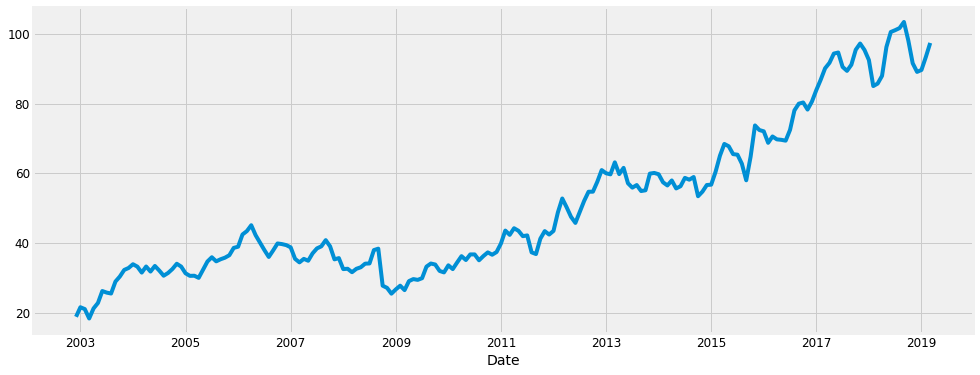

In [10]:
y.plot(figsize=(15, 6))
plt.show()

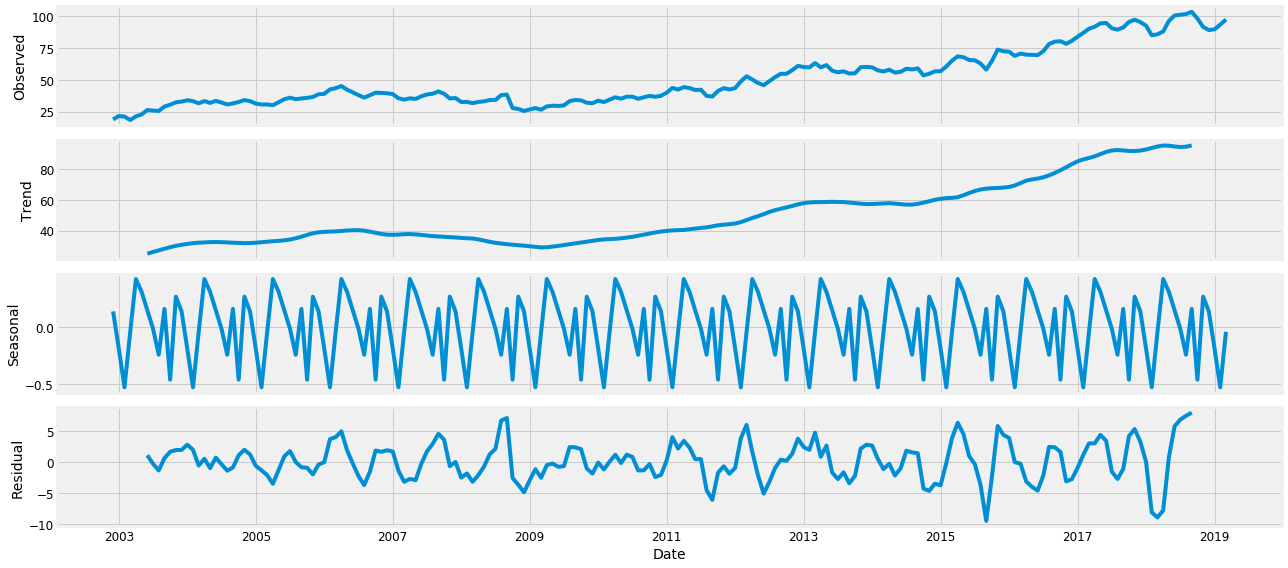

In [12]:
# time-series decomposition 
# decompose our time series into three distinct components: 
# trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2120.0095104224747
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1806.2856429602116
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1312.2189036634827
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1223.7929934502938
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1259.2930563634684
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1243.9928883656726
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1226.3144979960912
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1216.3098824486115
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1856.60195179653
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1564.7184898182777
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1114.670373985935
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1046.3766366608452
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1089.2446449575696
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1060.5469751198943
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1058.6880795553645
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1047.1516730142248
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:924.323713671272
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:872.228510171546

C:\Users\fenli\AppData\Local\Continuum\anaconda3\envs\fastai_1\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:877.5529100328044
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1000.2980879204333
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:857.8175865624883
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:874.26593306448
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:875.9064313641553
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:872.8435558843511
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:859.5035065845616
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:911.6105494989065


C:\Users\fenli\AppData\Local\Continuum\anaconda3\envs\fastai_1\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:863.0345415959214
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:978.1852105087899
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:842.4768542614247
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:864.5765885119315
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:861.8134848647833
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:866.0396107917114
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:844.0946055311238
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:914.006134141262
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:862.7314163343272
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:992.5457582141515
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:843.1071290041892
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:863.1569155346172
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:864.3489080955549
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:864.8141324184663
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:844.9833288046552
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:909.9403939520876
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:858.5959063666365
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:982.7622728844931
ARIMA(1, 1,

### Fitting the ARIMA model

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6094      0.168     -3.625      0.000      -0.939      -0.280
ma.L1          0.8249      0.118      7.009      0.000       0.594       1.056
ar.S.L12      -0.6428      0.057    -11.223      0.000      -0.755      -0.531
sigma2         8.8344      0.853     10.359      0.000       7.163      10.506


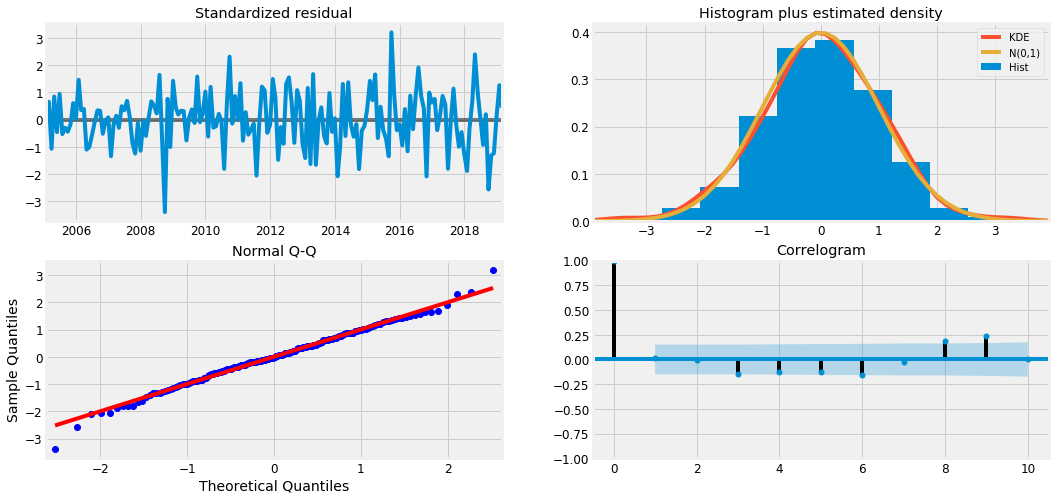

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating forecasts

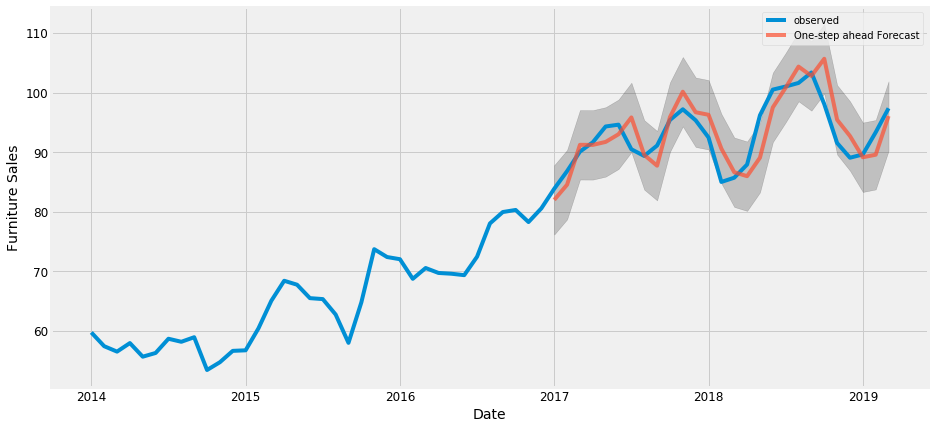

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10.76


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3.28


### Producing and visualizing forecasts

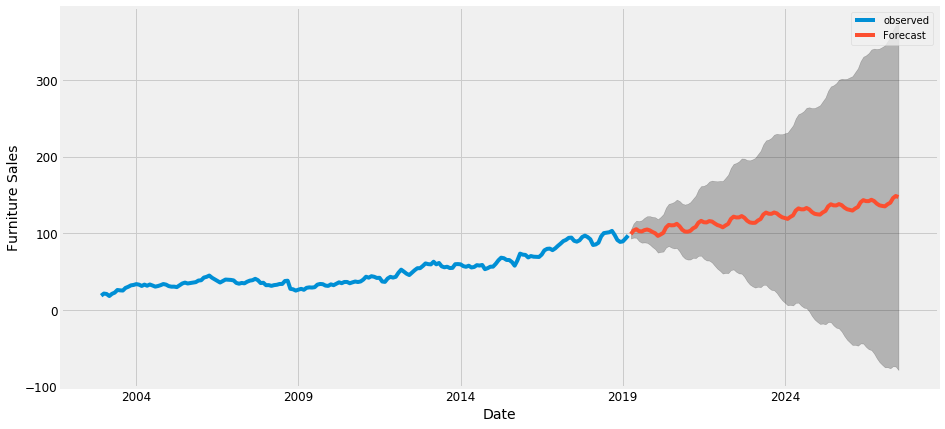

In [23]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()